Q. Write a program to implement Support Vector Machine Algorithm to solve classification problem on two different datasets individually.

### For Dataset: Nissan-data.csv

Importing necessary libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

Importing first dataset and head of the df

In [67]:
df = pd.read_csv('nissan-dataset.csv')
df.head()

,id,full_name,age,gender,model,color,performance,km,condition,price
0,1,Dominic Applin,42.0,Male,Quest,Mauv,299.0,509305.0,very bad,40394.91
1,2,Lenee Eteen,54.0,Polygender,R'nessa,Orange,109.0,965853.0,old,8687.90
2,3,Kendal Esselin,37.0,Male,March / Micra,Teal,52.0,380906.0,bad,44705.31
3,4,Nehemiah Marvelley,55.0,Male,Gloria,Green,336.0,573171.0,very good,32889.88
4,5,Domenic McGeouch,21.0,Male,Avenir,Khaki,2.0,809470.0,old,6949.22


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           10000 non-null  int64  
 1   full_name    9157 non-null   object 
 2   age          9154 non-null   float64
 3   gender       9144 non-null   object 
 4   model        9130 non-null   object 
 5   color        9139 non-null   object 
 6   performance  9143 non-null   float64
 7   km           9141 non-null   float64
 8   condition    9151 non-null   object 
 9   price        9159 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 781.4+ KB


In [69]:
df.isnull().sum()

id               0
full_name      843
age            846
gender         856
model          870
color          861
performance    857
km             859
condition      849
price          841
dtype: int64

In [70]:
df.dropna(inplace=True)

In [71]:
df.isnull().sum()

id             0
full_name      0
age            0
gender         0
model          0
color          0
performance    0
km             0
condition      0
price          0
dtype: int64

In [72]:
df.describe()

,id,age,performance,km,price
count,9053.000000,9053.000000,9053.000000,9053.000000,9053.000000
mean,4983.303435,43.080305,197.822379,503871.380979,27361.050557
std,2905.407440,14.783407,112.850882,284898.768044,13463.534018
min,1.000000,18.000000,0.000000,808.000000,5000.250000
25%,2470.000000,31.000000,102.000000,258709.000000,15960.500000
50%,4969.000000,43.000000,196.000000,502308.000000,27328.560000
75%,7510.000000,56.000000,296.000000,749260.000000,38385.630000
max,10000.000000,69.000000,399.000000,999915.000000,215674.780000


In [73]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [74]:
median_price = df['price'].median()
df['high_price'] = (df['price'] > median_price).astype(int)

In [75]:
df = df.drop(['id', 'full_name', 'price','gender'], axis=1)

In [76]:
df = pd.get_dummies(df, drop_first=True)

In [77]:
X = df.drop('high_price', axis=1)
y = df['high_price']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
svm_model = SVC(kernel='linear')

svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

In [80]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [81]:
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

print("\nAccuracy Score:")
print(accuracy)

Confusion Matrix:
[[692 233]
 [643 243]]

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.75      0.61       925
           1       0.51      0.27      0.36       886

    accuracy                           0.52      1811
   macro avg       0.51      0.51      0.48      1811
weighted avg       0.51      0.52      0.49      1811


Accuracy Score:
0.5162893429044727


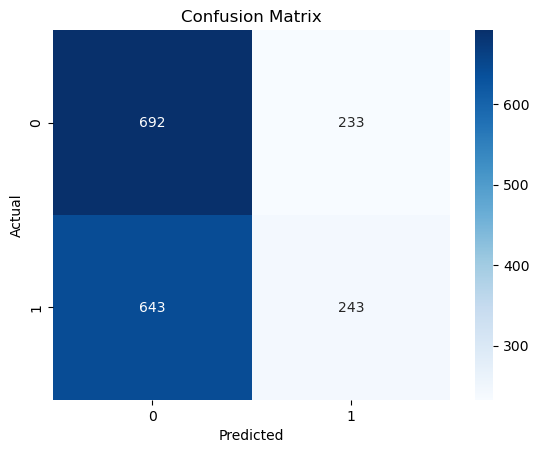

In [82]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### For dataset: Plant growth data

In [3]:
df1 = pd.read_csv('plant_growth_data.csv')
df1.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


In [6]:
df1.isnull().sum()

Soil_Type           0
Sunlight_Hours      0
Water_Frequency     0
Fertilizer_Type     0
Temperature         0
Humidity            0
Growth_Milestone    0
dtype: int64

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Soil_Type         193 non-null    object 
 1   Sunlight_Hours    193 non-null    float64
 2   Water_Frequency   193 non-null    object 
 3   Fertilizer_Type   193 non-null    object 
 4   Temperature       193 non-null    float64
 5   Humidity          193 non-null    float64
 6   Growth_Milestone  193 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 10.7+ KB


In [7]:
df1.describe()

,Sunlight_Hours,Temperature,Humidity,Growth_Milestone
count,193.000000,193.000000,193.000000,193.000000
mean,6.826484,25.076087,58.098927,0.497409
std,1.599509,5.354170,12.631799,0.501294
min,4.033133,15.200000,30.567682,0.000000
25%,5.477000,20.637095,49.300000,0.000000
50%,6.833290,25.912336,59.182806,0.000000
75%,8.241144,29.757938,69.100000,1.000000
max,9.913903,34.810103,79.648240,1.000000


In [10]:
label_encoders = {}
categorical_columns = ['Soil_Type', 'Water_Frequency', 'Fertilizer_Type']
for column in categorical_columns:
    le = LabelEncoder()
    df1[column] = le.fit_transform(df1[column])
    label_encoders[column] = le

In [11]:
df1.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,1,5.192294,0,0,31.719602,61.591861,0
1,2,4.033133,2,2,28.919484,52.422276,1
2,1,8.892769,0,1,23.179059,44.660539,0
3,1,8.241144,0,1,18.465886,46.433227,0
4,2,8.374043,0,2,18.128741,63.625923,0


In [12]:
X = df1.drop('Growth_Milestone', axis=1)
y = df1['Growth_Milestone']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [16]:
y_pred = svm.predict(X_test)

In [19]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.59      0.49        17
           1       0.53      0.36      0.43        22

    accuracy                           0.46        39
   macro avg       0.47      0.48      0.46        39
weighted avg       0.48      0.46      0.46        39



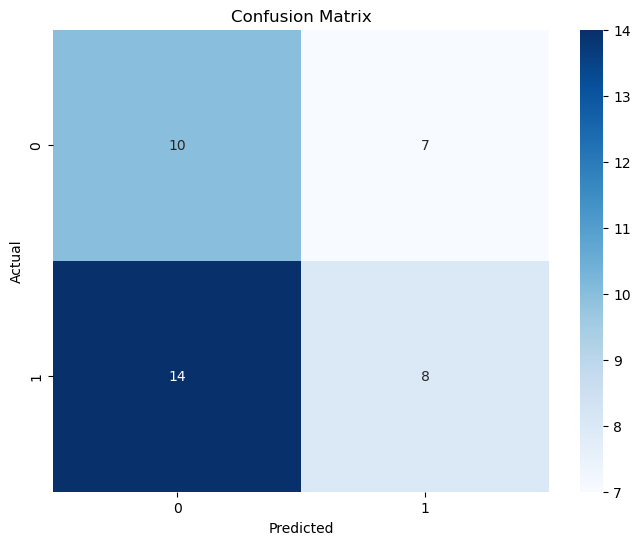

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()